In [30]:
data = pd.read_csv('data.csv')

In [31]:
data

,Month,Posts Total,Posts Growth,Views,Views Growth
0,2016 10,0,0,2,236
1,2016 11,4,4,218,454
2,2016 12,2,6,191,645
3,2017 01,0,6,3,648
4,2017 02,0,6,16,664
...,...,...,...,...,...
85,2023 11,9,2056,4812,1417148
86,2023 12,27,2083,7431,1424579
87,2024 01,38,2121,6042,1430621
88,2024 02,19,2140,6922,1437543


<AxesSubplot:>

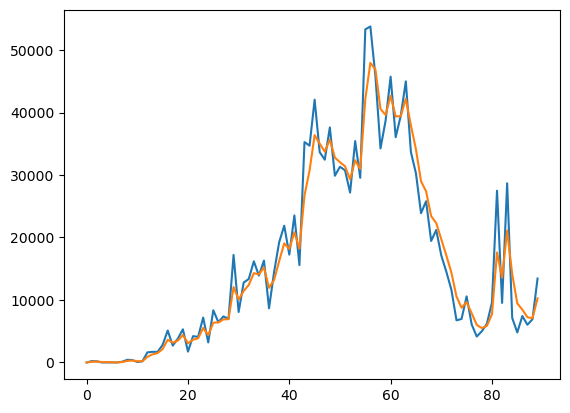

In [32]:
# Assuming your time series data is loaded in a pandas Series named 'values'

values = data['Views']
predictions = predict_ema(values, alpha=0.5)  # Adjust alpha as needed

# Plot the original data and the EMA predictions
values.plot(label="Original Data")
predictions.plot(label="EMA Prediction")


In [33]:
df = pd.DataFrame({
    'Month': data['Month'],
    'Views': data['Views'],
    'EMA': predictions
})

In [34]:
df

,Month,Views,EMA
0,2016 10,2,2.00
1,2016 11,218,110.00
2,2016 12,191,150.50
3,2017 01,3,76.75
4,2017 02,16,46.38
...,...,...,...
85,2023 11,4812,9465.81
86,2023 12,7431,8448.40
87,2024 01,6042,7245.20
88,2024 02,6922,7083.60


/home/ashish/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:>

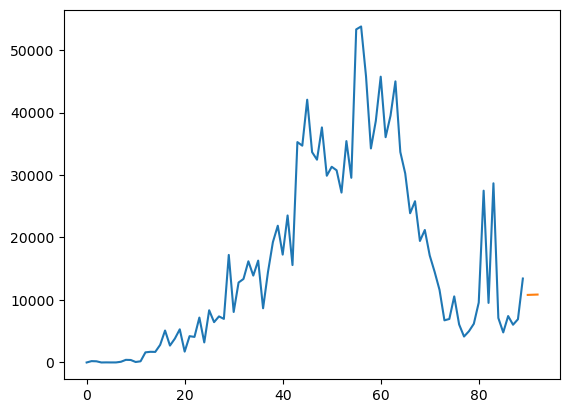

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def predict_ema_statsmodels(data, alpha=0.5):
  """
  This function uses statsmodels to fit an Exponential Smoothing model (equivalent to EMA) 
  and generate predictions for a 1D time series data.

  Args:
      data (pandas.Series): The time series data.
      alpha (float): The smoothing factor (0 < alpha <= 1).

  Returns:
      pandas.Series: The predicted values using EMA.
  """
  model = ExponentialSmoothing(data, trend="add", seasonal=None)  # Set trend to 'add' for EMA
  model_fit = model.fit()
  predictions = model_fit.forecast(3)
  return predictions


# Assuming your time series data is loaded in a pandas Series named 'values'
predictions_sm = predict_ema_statsmodels(values, alpha=0.5)  # Adjust alpha as needed

# Plot the original data and the EMA predictions
values.plot(label="Original Data")
predictions_sm.plot(label="EMA Prediction")

In [26]:
predictions_sm

90    10811.852982
91    10840.919992
92    10869.987003
dtype: float64